In [59]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.metrics import categorical_crossentropy
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
import numpy as np


In [60]:
train_directory='C:/Users/Asus/Documents/python/output/train'
test_directory='C:/Users/Asus/Documents/python/output/val'

In [61]:
train_datagen = ImageDataGenerator(rescale = 1/255)

test_datagen = ImageDataGenerator(rescale = 1/255)

In [62]:
training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 35163 images belonging to 332 classes.
Found 8952 images belonging to 332 classes.


In [71]:

  # Initialize the model
  model = tf.keras.models.Sequential([

  # layer 1-2: 2 convolutional layers + 1 max-pooling layer 
  tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (224,224,3)),
  tf.keras.layers.MaxPool2D(2,2),

  tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
  tf.keras.layers.MaxPool2D(2,2),

  tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
  tf.keras.layers.MaxPool2D(2,2),

  tf.keras.layers.Dropout(0.2),  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512 , activation = 'relu'),
  tf.keras.layers.Dense(332 , activation = 'softmax')
                                   ])


In [6]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [8]:
epochs = 15
history = model.fit(
  training_set,
  validation_data=test_set,
  epochs=epochs
)

Epoch 1/15
2198/2198 [==============================] - 384s 167ms/step - loss: 4.7042 - accuracy: 0.1042 - val_loss: 3.8700 - val_accuracy: 0.1813
Epoch 2/15
2198/2198 [==============================] - 336s 153ms/step - loss: 3.2240 - accuracy: 0.2807 - val_loss: 3.2963 - val_accuracy: 0.2694
Epoch 3/15
2198/2198 [==============================] - 330s 150ms/step - loss: 2.0038 - accuracy: 0.5009 - val_loss: 3.4591 - val_accuracy: 0.2885
Epoch 4/15
2198/2198 [==============================] - 332s 151ms/step - loss: 0.9209 - accuracy: 0.7514 - val_loss: 4.5038 - val_accuracy: 0.2691
Epoch 5/15
2198/2198 [==============================] - 342s 156ms/step - loss: 0.4034 - accuracy: 0.8869 - val_loss: 5.4757 - val_accuracy: 0.2660
Epoch 6/15
2198/2198 [==============================] - 318s 144ms/step - loss: 0.2665 - accuracy: 0.9257 - val_loss: 6.2716 - val_accuracy: 0.2713
Epoch 7/15
2198/2198 [==============================] - 192s 87ms/step - loss: 0.2220 - accuracy: 0.9383 - val_l

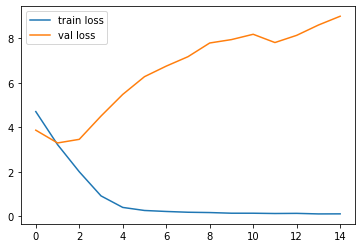

In [10]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

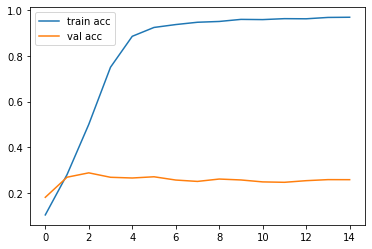

In [11]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [12]:
model.save('WA.h5')

In [63]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array

model1 = load_model('./WA.h5',compile=False)

In [64]:
lab = training_set.class_indices
lab={k:v for v,k in lab.items()}

In [81]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    max_value = np.max(answer)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = lab[y]
    return answer

In [72]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model_WB1.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Asus\AppData\Local\Temp\tmp730cj1ti\assets


INFO:tensorflow:Assets written to: C:\Users\Asus\AppData\Local\Temp\tmp730cj1ti\assets


In [82]:
img='C:/Users/Asus/Documents/python/kumara.png'
pic=load_img('C:/Users/Asus/Documents/python/kumara.png',target_size=(224,224,3))

output(img)

array([[3.14422175e-02, 5.06418473e-06, 1.14785337e-08, 7.69610295e-08,
        3.30652401e-04, 7.70142265e-07, 1.79449017e-07, 2.99635976e-05,
        1.12873963e-07, 8.21411784e-04, 7.72700296e-05, 2.30920523e-06,
        8.63870955e-05, 2.24893902e-05, 6.04450122e-07, 1.48588668e-07,
        3.46636407e-05, 1.46272372e-08, 2.90317566e-08, 1.23609288e-05,
        1.79027833e-04, 3.29729155e-05, 4.04971623e-04, 3.04562185e-04,
        4.74325643e-05, 3.52034755e-02, 1.00052543e-10, 7.51524190e-12,
        2.29269685e-12, 4.31947633e-09, 1.54995675e-07, 1.13159682e-09,
        6.63355735e-08, 3.97321535e-03, 3.93095752e-03, 3.00568175e-02,
        3.62172470e-09, 1.23974787e-05, 2.05406127e-06, 5.13883773e-04,
        1.67535404e-06, 1.08837883e-09, 2.10590461e-08, 6.31036022e-13,
        3.57416039e-03, 2.75663007e-02, 6.12078429e-06, 6.37780762e-09,
        1.88057712e-07, 9.74832517e-08, 1.00689851e-06, 2.00436862e-05,
        2.12728287e-06, 2.22800554e-05, 1.31759397e-03, 1.236049